# Base Telco Customer




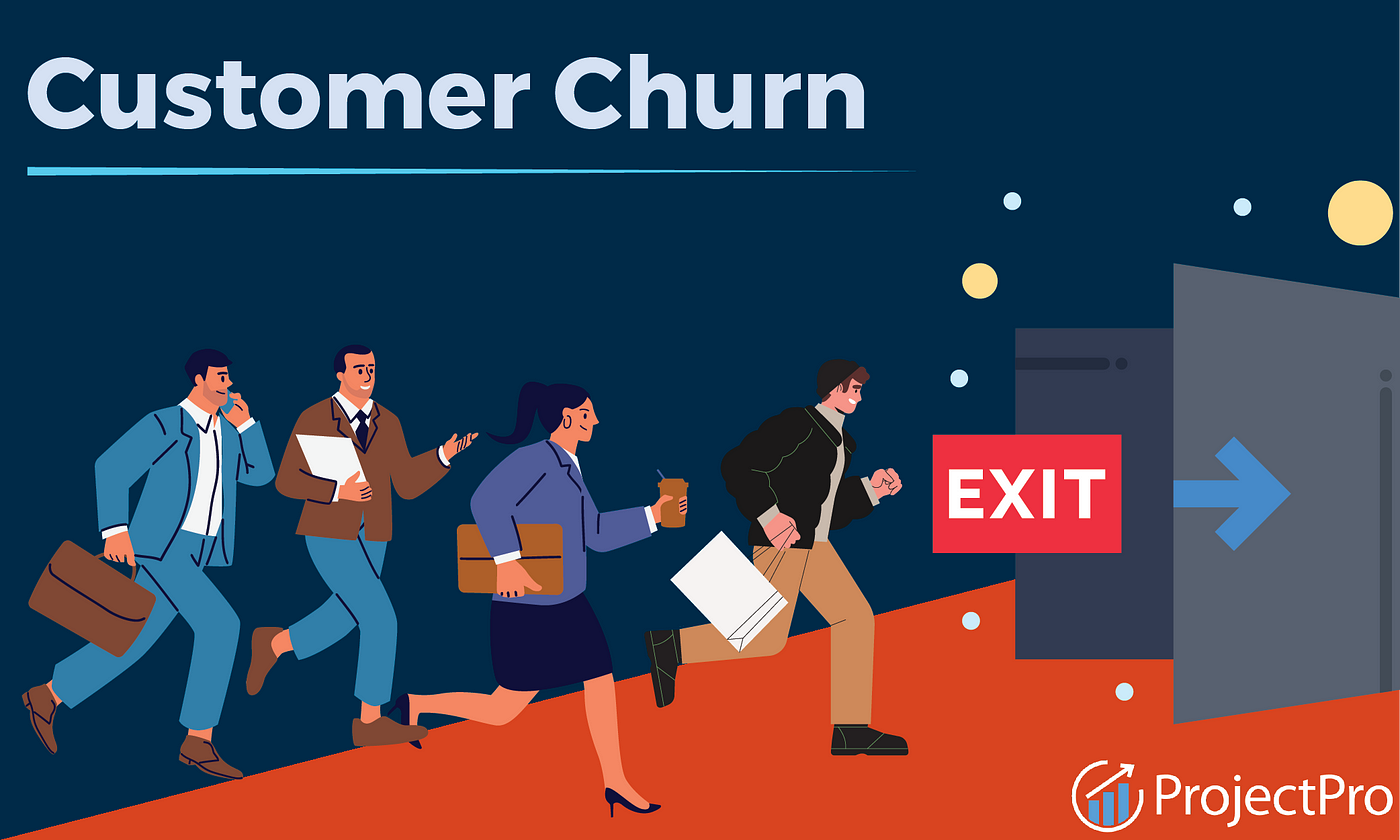

Este notebook tem como objetivo explorar o dataset Telco Customer Churn, que contém informações sobre clientes de uma empresa de telecomunicações fictícia, com foco na previsão de rotatividade (churn). O dataset é composto por 7.043 registros e 21 colunas, incluindo variáveis demográficas (ex.: gênero, idade), serviços contratados (ex.: tipo de internet, suporte técnico), informações de conta (ex.: tipo de contrato, mensalidade) e a variável alvo Churn (indica se o cliente abandonou a empresa).

A exploração será conduzida por meio de análise exploratória de dados (EDA) para identificar padrões, correlações e fatores que influenciam o churn, como tempo de permanência, tipo de contrato e serviços adicionais. Além disso, serão aplicadas técnicas de pré-processamento (tratamento de valores nulos, codificação de variáveis categóricas, normalização) e feature engineering para preparar o dataset para modelagem. O objetivo final é construir um modelo de classificação supervisionada capaz de prever o churn com alta precisão, utilizando algoritmos como Regressão Logística, Random Forest e XGBoost, e avaliando métricas como AUC-ROC, F1-Score e Recall, especialmente para a classe minoritária (Churn = Yes).

Os insights gerados serão usados para propor estratégias de retenção, como oferecer contratos de longo prazo ou melhorar serviços críticos, contribuindo para a redução da taxa de churn e informando decisões de negócio baseadas em dados.

**📄 Identificação do Cliente**

- **customerID:** Identificador único de cada cliente

**👤 Informações Demográficas**

- **gender:** Gênero do cliente (Masculino/Feminino).

- **SeniorCitizen:** Indica se o cliente é idoso (1) ou não (0).

- **Partner:** Indica se o cliente possui parceiro ou cônjuge (Sim/Não).

- **Dependents:** Indica se o cliente possui dependentes (Sim/Não)

**🏠 Informações de Conta**

- **tenure:** Número de meses que o cliente está com a empresa.

- **Contract:** Tipo de contrato (Mensal, Um ano, Dois anos).

- **PaperlessBilling:** Indica se o cliente optou por fatura sem papel (Sim/Não).

- **PaymentMethod:** Método de pagamento utilizado (e.g., Débito automático, Cartão de crédito, Boleto bancário).


**💰 Informações Financeiras**

- **MonthlyCharges:** Valor cobrado mensalmente ao cliente.

- **TotalCharges:** Valor total cobrado ao cliente até o momento

**📡 Serviços Contratados**

- **PhoneService:** Indica se o cliente possui serviço telefônico (Sim/Não).

- **MultipleLines:** Indica se o cliente possui múltiplas linhas telefônicas (Sim/Não/Não disponível).

- **InternetService:** Tipo de serviço de internet (DSL, Fibra óptica, Nenhum).

- **OnlineSecurity:** Indica se o cliente possui serviço de segurança online (Sim/Não/Não disponível).

- **OnlineBackup:** Indica se o cliente possui serviço de backup online (Sim/Não/Não disponível).

- **DeviceProtection:** Indica se o cliente possui proteção de dispositivo (Sim/Não/Não disponível).

- **TechSupport:** Indica se o cliente possui suporte técnico (Sim/Não/Não disponível).

- **StreamingTV:** Indica se o cliente possui serviço de streaming de TV (Sim/Não/Não disponível).

- **StreamingMovies:** Indica se o cliente possui serviço de streaming de filmes (Sim/Não/Não disponível).

# Análises a serem feitas




**🔎 1️⃣ Análises Univariadas:**

- Distribuição de variáveis categóricas como **gender**, **SeniorCitizen**, **Partner**, **Dependents** e **InternetService**.

- Análise de densidade e distribuição para variáveis numéricas como **tenure**, **MonthlyCharges** e **TotalCharges**.

- Taxa de cancelamento (Churn) global e segmentada.



**🔄 2️⃣ Análises Bivariadas:**

- **Churn vs. Contract Type:** Tipos de contrato influenciam na taxa de cancelamento? Clientes com contratos mensais tendem a cancelar mais?

- **Churn vs. InternetService:** Clientes de Fibra Óptica cancelam mais que DSL?

- **Churn vs. PaymentMethod:** O método de pagamento (automático, boleto, cartão) impacta na retenção?

- **MonthlyCharges vs. Churn:** Há correlação entre o valor mensal pago e o cancelamento?

- **tenure vs. Churn:** Clientes com maior tempo de casa cancelam menos?

- **Services QTD vs Churn:**Quantos serviços a pessoa contratou e o quanto a quantidade de serviços contratados influencia no Churn

- **Service Type vs Churn:** qual a proporção de pessoas que contrataram X serviço churnaram.

**👥 3️⃣ Análises Multivariadas:**

- **Contract + InternetService + Churn:** Existe um padrão entre o tipo de internet e o contrato que aumenta a chance de cancelamento?

- **PaymentMethod + PaperlessBilling + Churn:** Pagamento automático versus boleto e suas relações com cancelamento.

- **SeniorCitizen + Dependents + Churn:** Idosos sem dependentes cancelam mais?

- **TechSupport + OnlineSecurity + Churn:** A ausência desses serviços aumenta a chance de churn?



**📊4️⃣ Análises de Correlação:**

- Matriz de correlação para identificar relações lineares entre as variáveis numéricas (tenure, MonthlyCharges, TotalCharges).

- Análise de correlação entre serviços contratados e a taxa de cancelamento.



**🔍 5️⃣ Análises de Segmentação (Clusterização):**

- Segmentar os clientes com base nos serviços utilizados, valor mensal e tempo de contrato para identificar perfis de risco.

🔍 5️⃣ Outras análises:

**Serviços Mais Contratados vs. Churn:**

- **Análise:** Identificar os serviços mais populares e verificar se esses serviços possuem uma taxa de churn elevada.

- **Objetivo:** Descobrir quais serviços possuem maior retenção ou evasão de clientes.

- **Visualização sugerida:** Barplot para popularidade dos serviços e taxa de churn associada.



**Serviços Contratados por Gênero, SeniorCitizen e Dependents:**

- **Análise:** Verificar se há diferenças significativas nos serviços contratados com base em:

 - **Gênero (gender)**

 - **Idosos (SeniorCitizen)**

 - **Dependentes (Dependents)**

- **Objetivo:** Identificar perfis de consumo de serviços específicos para cada grupo.

- **Visualização sugerida:** Heatmap ou stacked bar plot para visualizar essas diferenças.

# Importação das bibliotecas básicas

In [ ]:
!pip install optuna-integration[sklearn]

In [ ]:
!pip -q install plotly --upgrade

In [ ]:
!pip -q install yellowbrick

In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import RobustScaler
from scipy.stats import chi2_contingency
import pickle
from pycaret.classification import get_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split







In [ ]:
base_telco_df = pd.read_csv('telco_customer_churn.csv')

# Exploração dos dados

### Estatísticas básicas

In [ ]:
base_telco_df

In [ ]:
base_telco_df.head()

In [ ]:
base_telco_df.tail()

In [ ]:
base_telco_df.describe()

In [ ]:
base_telco_df.info()

In [ ]:
base_telco_df.isnull().sum()

### Testes de Correlação estatística

### Visualização dos dados


In [ ]:
sns.countplot(x='gender', data=base_telco_df)
plt.title('Distribuição de Genero')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Contagem')
plt.show()

In [ ]:
sns.countplot(x='Partner', data=base_telco_df)
plt.title('Distribuição de pessoas com parceiros')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Contagem')
plt.show()

In [ ]:
sns.countplot(x='Dependents', data=base_telco_df)
plt.title('Distribuição de pessoas com dependentes')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Contagem')
plt.show()

In [ ]:
sns.countplot(x='InternetService', data=base_telco_df)
plt.title('Distribuição de InternetService')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Contagem')
plt.show()

In [ ]:
base_telco_df['SeniorCitizen'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'])
plt.title('Proporção de Idosos')
plt.ylabel('')  # Remove o label para melhor visualização
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(1, 3, i + 1)
    plt.hist(base_telco_df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=base_telco_df[col], color='lightblue')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Taxa de cancelamento global
churn_rate = base_telco_df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

In [ ]:

labels = ['Não Cancelaram', 'Cancelaram']
plt.figure(figsize=(5, 5))
plt.pie(churn_rate, labels=labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
plt.title('Taxa de Cancelamento Global')
plt.show()

#### Visualização de relações Bivariadas

**Taxa de Cancelamento Segmentada**

#####➡️ Churn por Gênero (gender)

In [ ]:
churn_rate_gender = base_telco_df.groupby('gender')['Churn'].value_counts(normalize=True).unstack() * 100

In [ ]:
churn_rate_gender

In [ ]:
churn_rate_gender = churn_rate_gender['Yes'].reset_index().rename(columns={'Yes': 'Churn_Rate'})

In [ ]:
sns.barplot(x='gender', y='Churn_Rate', data=churn_rate_gender )
plt.title('Taxa de Churn por genero')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Taxa de Churn')
plt.ylim(0, 1)  # Definir o limite do eixo y entre 0 e 1 para proporções
plt.show()

#####**➡️Churn por Idosos (SeniorCitizen)**

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(x='SeniorCitizen', hue='Churn', data=base_telco_df, estimator=lambda x: len(x) / len(base_telco_df) * 100, legend=True)
plt.title('Taxa de Churn por Idosos (%)')
plt.ylabel('Churn (%)')
plt.show()


#####**➡️Churn por Tipo de Internet (InternetService)**

In [ ]:
# Calcular a taxa de churn por InternetService
churn_rate = base_telco_df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100

In [ ]:
churn_rate

In [ ]:
churn_rate = churn_rate['Yes'].reset_index().rename(columns={'Yes': 'Churn_Rate'})

In [ ]:
sns.barplot(x='InternetService', y='Churn_Rate', data=churn_rate)
plt.title('Taxa de Churn por Tipo de Serviço de Internet')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Taxa de Churn')
plt.ylim(0, 1)  # Definir o limite do eixo y entre 0 e 1 para proporções
plt.show()

#####**➡️Churn por Tipo de Contrato (Contract)**

In [ ]:
churn_rate_contract = base_telco_df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100

In [ ]:
churn_rate_contract = churn_rate_contract['Yes'].reset_index().rename(columns={'Yes': 'Churn_Rate'})

In [ ]:
sns.barplot(x='Contract', y='Churn_Rate', data=churn_rate_contract)
plt.title('Taxa de Churn por Tipo de Serviço de Internet')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Taxa de Churn')
plt.ylim(0, 1)  # Definir o limite do eixo y entre 0 e 1 para proporções
plt.show()

#####**➡️Churn por Método de pagamento(PaymentMethod)**

In [ ]:
churn_rate_payment = base_telco_df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100

In [ ]:
churn_rate_contract = churn_rate_payment['Yes'].reset_index().rename(columns={'Yes': 'Churn_Rate'})

In [ ]:
sns.barplot(x='PaymentMethod', y='Churn_Rate', data=churn_rate_contract)
plt.title('Taxa de Churn por Tipo de Método de pagamento')
plt.xlabel('Tipo de Método de pagamento')
plt.ylabel('Taxa de Churn')
plt.ylim(0, 1)  # Definir o limite do eixo y entre 0 e 1 para proporções
plt.show()

In [ ]:

plt.figure(figsize=(6, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=base_telco_df, palette='Set2')
plt.title('Distribuição de MonthlyCharges por Churn')
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=base_telco_df, palette='Set2')
plt.title('Tempo de Permanência (tenure) por Churn')
plt.ylabel('Tempo de Permanência (meses)')
plt.xlabel('Cancelamento')
plt.show()

#####**➡️Churn por serviço contratado(TypeService)**

In [ ]:


# Serviços a serem analisados
services = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Loop para criar crosstabs
for service in services:
    print(f"\n--- {service} ---")
    crosstab = pd.crosstab(base_telco_df[service], base_telco_df['Churn'], margins=True, normalize='index') * 100
    print(crosstab)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Loop para gerar gráficos
for i, service in enumerate(services):
    plt.subplot(2, 5, i + 1)
    sns.barplot(x=service, y='Churn', data=base_telco_df, estimator=lambda x: len(x) / len(base_telco_df) * 100, ci=None, palette='Set2')
    plt.title(f'{service}')
    plt.ylabel('Churn (%)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Visualização de relações multivariadas

#####**➡️ Por Tipo de Contrato e Serviço de Internet**

In [ ]:
import pandas as pd

crosstab = pd.crosstab([base_telco_df['Contract'], base_telco_df['InternetService']], base_telco_df['Churn'], margins=True,normalize='index')*100
print(crosstab)


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='Yes', hue='InternetService', data=crosstab, palette='Set2')
plt.title('Taxa de Churn (%) por Contrato e Serviço de Internet')
plt.ylabel('Churn (%)')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
crosstab_percent = pd.crosstab(base_telco_df['Contract'], base_telco_df['InternetService'], normalize='index')
sns.heatmap(crosstab_percent, annot=True, cmap='Blues', fmt='.2f')
plt.title('Proporção de InternetService por Tipo de Contrato')
plt.show()


In [ ]:
# Tabela cruzada entre PaymentMethod, PaperlessBilling e Churn
crosstab = pd.crosstab([base_telco_df['PaymentMethod'], base_telco_df['PaperlessBilling']], base_telco_df['Churn'], margins=True)
crosstab.columns = ['Não Cancelou', 'Cancelou', 'Total']
crosstab.index.names = ['Método de Pagamento', 'Fatura Digital']
crosstab


In [ ]:
plt.figure(figsize=(8, 6))
crosstab_percent = pd.crosstab([base_telco_df['PaymentMethod'], base_telco_df['PaperlessBilling']], base_telco_df['Churn'], normalize='index')
sns.heatmap(crosstab_percent, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Proporção de Churn por Método de Pagamento e Fatura Digital')
plt.show()


#####**🔎 Análise Multivariada para: SeniorCitizen + Dependents + Churn**

**🔹 1️⃣ Tabela Cruzada (Crosstab):**

In [ ]:
# Tabela cruzada entre SeniorCitizen, Dependents e Churn
crosstab_senior = pd.crosstab([base_telco_df['SeniorCitizen'], base_telco_df['Dependents']], base_telco_df['Churn'], margins=True)
crosstab_senior.columns = ['Não Cancelou', 'Cancelou', 'Total']
crosstab_senior.index.names = ['Idoso', 'Possui Dependentes']
crosstab_senior

**🔹 2️⃣ Heatmap para Visualização das Proporções:**

In [ ]:
plt.figure(figsize=(8, 6))
crosstab_percent = pd.crosstab([base_telco_df['SeniorCitizen'], base_telco_df['Dependents']], base_telco_df['Churn'], normalize='index') * 100
sns.heatmap(crosstab_percent, annot=True, cmap='Blues', fmt='.2f')
plt.title('Proporção de Churn - Idosos vs. Dependentes')
plt.show()

**🔹 3️⃣ Teste Qui-Quadrado:**

Para confirmar se existe relação estatística.

In [ ]:
# Tabela de contingência
contingency_table_senior = pd.crosstab([base_telco_df['SeniorCitizen'], base_telco_df['Dependents']], base_telco_df['Churn'])

# Aplicando o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table_senior)

print(f"Valor de p: {p}")
if p < 0.05:
    print("Existe uma associação significativa entre Idoso, Dependentes e Churn.")
else:
    print("Não existe uma associação significativa entre Idoso, Dependentes e Churn.")

#####**🔎 Análise Multivariada para: TechSupport + OnlineSecurity + Churn**

A ideia é verificar se a ausência desses serviços aumenta a taxa de churn.

**🔹 1️⃣ Tabela Cruzada (Crosstab):**

Visualizando combinações de serviços de segurança online e suporte técnico.

In [ ]:
# Tabela cruzada entre TechSupport, OnlineSecurity e Churn
crosstab_tech = pd.crosstab([base_telco_df['TechSupport'], base_telco_df['OnlineSecurity']], base_telco_df['Churn'], margins=True)
crosstab_tech.columns = ['Não Cancelou', 'Cancelou', 'Total']
crosstab_tech.index.names = ['Suporte Técnico', 'Segurança Online']
crosstab_tech


**🔹 2️⃣ Heatmap para Visualização:**

In [ ]:
plt.figure(figsize=(8, 6))
crosstab_percent = pd.crosstab([base_telco_df['TechSupport'], base_telco_df['OnlineSecurity']], base_telco_df['Churn'], normalize='index') * 100
sns.heatmap(crosstab_percent, annot=True, cmap='Reds', fmt='.2f')
plt.title('Proporção de Churn - TechSupport vs. OnlineSecurity')
plt.show()


**🔹 3️⃣ Barplot Multivariado:**

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='TechSupport', y='Churn', hue='OnlineSecurity', data=base_telco_df, estimator=lambda x: len(x) / len(base_telco_df) * 100, ci=None, palette='Set1')
plt.title('Taxa de Churn - Suporte Técnico vs. Segurança Online (%)')
plt.ylabel('Churn (%)')
plt.show()


**🔹 4️⃣ Teste Qui-Quadrado:**

In [ ]:
# Tabela de contingência
contingency_table_tech = pd.crosstab([base_telco_df['TechSupport'], base_telco_df['OnlineSecurity']], base_telco_df['Churn'])

# Aplicando o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table_tech)

print(f"Valor de p: {p}")
if p < 0.05:
    print("Existe uma associação significativa entre Suporte Técnico, Segurança Online e Churn.")
else:
    print("Não existe uma associação significativa entre Suporte Técnico, Segurança Online e Churn.")


In [ ]:
base_telco_df.columns = base_telco_df.columns.str.replace(' ', '_')


In [ ]:
# Substituir espaços nos nomes das colunas
base_telco_df.columns = base_telco_df.columns.str.replace(' ', '_')

# Substituir espaços nos valores das colunas categóricas
for col in base_telco_df.select_dtypes(include=['object']).columns:
    base_telco_df[col] = base_telco_df[col].str.replace(' ', '_')

# Copiar para o dataframe limpo
base_telco_df_clean = base_telco_df.copy()




## comparação de modelos com pycaret

In [ ]:
from pycaret.classification import *
from imblearn.under_sampling import RandomUnderSampler
# Configurar PyCaret com undersampling
#undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
s_trees = setup(
    data=base_telco_df_clean,
    target='Churn',
    preprocess=True,
    normalize=False,
    #normalize_method='robust',
    transformation=True,
    remove_multicollinearity=True,
    fix_imbalance_method='smote',
    #fix_imbalance_method=undersampler,
    fix_imbalance=True,
    #feature_selection=True,
    #feature_selection_method='classic',
    #feature_selection_estimator='lightgbm',
    ignore_features=['customerID'],  # Ignora colunas como IDs que não agregam valor
    session_id=123
)

In [ ]:
best_model = compare_models(
    sort='F1',  # Otimizar para F1-Score devido ao desbalanceamento
    n_select=1,  # Retornar apenas o melhor modelo
    include=['lr', 'rf', 'xgboost', 'lightgbm'],  # Modelos relevantes
    fold=10,  # Validação cruzada com 10 folds
    cross_validation=True  # Ativar validação cruzada
)

Avaliação inicial dos algoritmos


- Regressão logística: 78.50
- Light Gradient Boosting Machine: 68.97
- Random Forest Classifier: 74.14
- Extreme Gradient Boosting: 71.87


In [ ]:
# Visualizar pipeline
pipeline = get_config('pipeline')
print("Pipeline completo:\n", pipeline)

# Visualizar etapas do pipeline
for step_name, step_obj in pipeline.steps:
    print(f"Etapa: {step_name}, Transformador: {step_obj}")

## Tratamento dos dados

In [ ]:
X_data = base_telco_df_clean.drop('Churn', axis=1)
X_data = X_data.drop(columns=['customerID'])
X_data['TotalCharges'] = pd.to_numeric(X_data['TotalCharges'], errors='coerce')

y = base_telco_df_clean['Churn'].map({'Yes': 1, 'No': 0})




In [ ]:
base_telco_df_clean['TotalCharges']

**balanceamento de classes**


In [ ]:
categorical_cols = X_data.select_dtypes(include='object').columns

# Mostrar valores únicos por coluna categórica
for col in categorical_cols:
    print(f"\nColuna: {col}")
    print(X_data[col].unique())

In [ ]:
numeric_cols = X_data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    print(f"\nColuna: {col}")
    print(X_data[col].unique())

In [ ]:
!ls


In [ ]:
from process4 import DataPreprocessor

In [ ]:
numeric_features = ['tenure','TotalCharges','MonthlyCharges']
categorical_features = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
binary_feature = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','SeniorCitizen']

preprocessor = DataPreprocessor(numeric_features, categorical_features, binary_feature)
# Aplica a transformação
x_processed = preprocessor.data_transformer(X_data,fit=True)
X_res, y_res = preprocessor.apply_smote(x_processed, y)



In [ ]:
#feature_names = preprocessor.get_feature_names()
#feature_names

In [ ]:
x_processed

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res , test_size=0.2, random_state=42)


## Salvar as variáveis

In [ ]:
import pickle

In [ ]:
with open('telco.pkl', mode = 'wb') as f:
  pickle.dump([X_train, y_train, X_test , y_test], f)

In [ ]:
with open('telco.pkl', mode = 'wb') as f:
  pickle.dump([X_train, y_train, X_test, y_test], f)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


In [ ]:

y_pred_random_forest = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_random_forest)
print(f"Acurácia: {accuracy:.2f}")


# Regressão logística

In [ ]:
logistic_model = LogisticRegression(random_state = 1)
logistic_model.fit(X_train, y_train)

In [ ]:
y_pred_logistic = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Acurácia: {accuracy:.2f}")

In [ ]:
logistic_model.intercept_

In [ ]:
logistic_model.coef_

# XGBoost

In [ ]:
model_XGBoost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_XGBoost.fit(X_train, y_train)

# 6. Avaliar modelo
y_pred = model_XGBoost.predict(X_test)

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Redes Neurais

In [ ]:
# 3 -> 100 -> 100 -> 1
# 3 -> 2 -> 2 -> 1
rede_neural_telco = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_telco.fit(X_train, y_train)

In [ ]:
previsoes_rede_neural = rede_neural_telco.predict(X_test)
previsoes_rede_neural

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(previsoes_rede_neural, previsoes_rede_neural)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_telco)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# Avaliação dos algoritmos

- Naïve Bayes: 93.80
- Árvore de decisão: 98.20
- Random forest: 98.40
- Regras: 97.40
- Knn: 98.60
- Regressão logística: 94.60
- SVM: 98.80
- Redes neurais: 99.60

## Tuning dos parâmetros com GridSearch

In [ ]:
with open('telco.pkl', 'rb') as f:
  X_train, y_train, X_test, y_test = pickle.load(f)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:
X_telco = np.concatenate((X_train, X_test), axis = 0)
X_telco.shape

In [ ]:
X_telco

In [ ]:
y_telco = np.concatenate((y_train, y_test), axis = 0)
y_telco.shape

In [ ]:
y_telco

### Random forest

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_telco, y_telco)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

### Regressão logística

In [ ]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [ ]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_telco, y_telco)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

### XGBoost

In [ ]:
parametros = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.5, 1.0]
}


In [ ]:
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=parametros)
grid_search.fit(X_telco, y_telco)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

### Redes Neurais

In [ ]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_telco, y_telco)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

In [ ]:
print(melhores_parametros)
print(melhor_resultado)

## Validação cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:

resultados_random_forest = []
resultados_xgboost = []
resultados_logistica = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, X_telco, y_telco, cv = kfold)
  resultados_random_forest.append(scores.mean())

  logistic = LogisticRegression(C = 2.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistic, X_telco, y_telco, cv = kfold)
  resultados_logistica.append(scores.mean())

  XGboost = XGBClassifier(colsample_bytree = 1.0, gamma = 0.1, max_depth = 3, min_child_weight = 1, reg_alpha = 1.0, subsample= 0.8)
  scores = cross_val_score(XGboost, X_telco, y_telco, cv = kfold)
  resultados_xgboost.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 10, solver = 'adam')
  scores = cross_val_score(rede_neural, X_telco, y_telco, cv = kfold)
  resultados_rede_neural.append(scores.mean())


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [ ]:
resultados = pd.DataFrame({ 'Random forest': resultados_random_forest,
                            'Logistica': resultados_logistica,
                            'Rede neural': resultados_rede_neural,
                            'XGBoost': resultados_xgboost
                            })

resultados

In [ ]:
resultados.describe()

In [ ]:
resultados.var()

In [ ]:
(resultados.std() / resultados.mean()) * 100

## Teste de hipótese com ANOVA e Tukey

verificando se existe diferença significativa entre os modelos

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultados_random_forest,resultados_logistica, resultados_rede_neural)
p

In [ ]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

# Salvar um classificador já treinado

In [ ]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))